In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math

import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

import statsmodels.api as sm

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
# 'SciPy' is used to perform scientific computations
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
# Reading the Dataset
df = pd.read_excel (r'Book.xlsx')
df.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,46.00,4.600,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,112.01,11.201,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,31.15,3.115,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,26.20,2.620,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,160.00,16.000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania


# Preprocessing

In [3]:
# How many data-points and features?
df.shape

(51290, 20)

In [4]:
#. What are the number of rows and no. of cols & types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51290 non-null  object        
 1   Order Date        51290 non-null  datetime64[ns]
 2   Shipping Date     51290 non-null  datetime64[ns]
 3   Aging             51290 non-null  int64         
 4   Ship Mode         51290 non-null  object        
 5   Product Category  51290 non-null  object        
 6   Product           51290 non-null  object        
 7   Sales             51290 non-null  int64         
 8   Quantity          51290 non-null  int64         
 9   Discount          51290 non-null  float64       
 10  Profit            51290 non-null  float64       
 11  Shipping Cost     51290 non-null  float64       
 12  Order Priority    51290 non-null  object        
 13  Customer ID       51290 non-null  object        
 14  Customer Name     5129

In [5]:
# Retaining the original dataset
df_original=df.copy()

In [6]:
df_original.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,46.00,4.600,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,112.01,11.201,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,31.15,3.115,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,26.20,2.620,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,160.00,16.000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania


In [7]:
 #five-point summary for numerical variables
df.describe()

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,5.255040,156.431683,2.997309,0.029971,72.721836,7.272184
std,2.959905,65.781374,1.413453,0.014114,49.099328,4.909933
min,1.000000,33.000000,1.000000,0.010000,0.510000,0.051000
25%,3.000000,109.000000,2.000000,0.020000,25.730000,2.573000
50%,5.000000,159.000000,3.000000,0.030000,67.000000,6.700000
75%,8.000000,218.000000,4.000000,0.040000,120.560000,12.056000
max,10.000000,250.000000,5.000000,0.050000,167.500000,16.750000


# Seperating categorical and Numerical data

In [8]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include ='object')

In [9]:
df_cat.head(1)

,Order ID,Ship Mode,Product Category,Product,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region
0,AU-2015-1,First Class,Auto & Accessories,Car Media Players,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania


In [10]:
df_num.head(1)

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
0,8,140,2,0.05,46.0,4.6


In [11]:
#Checking Duplicated values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool

# Missing data

In [12]:
# checking for null values
df.isnull().sum()

Order ID            0
Order Date          0
Shipping Date       0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
dtype: int64

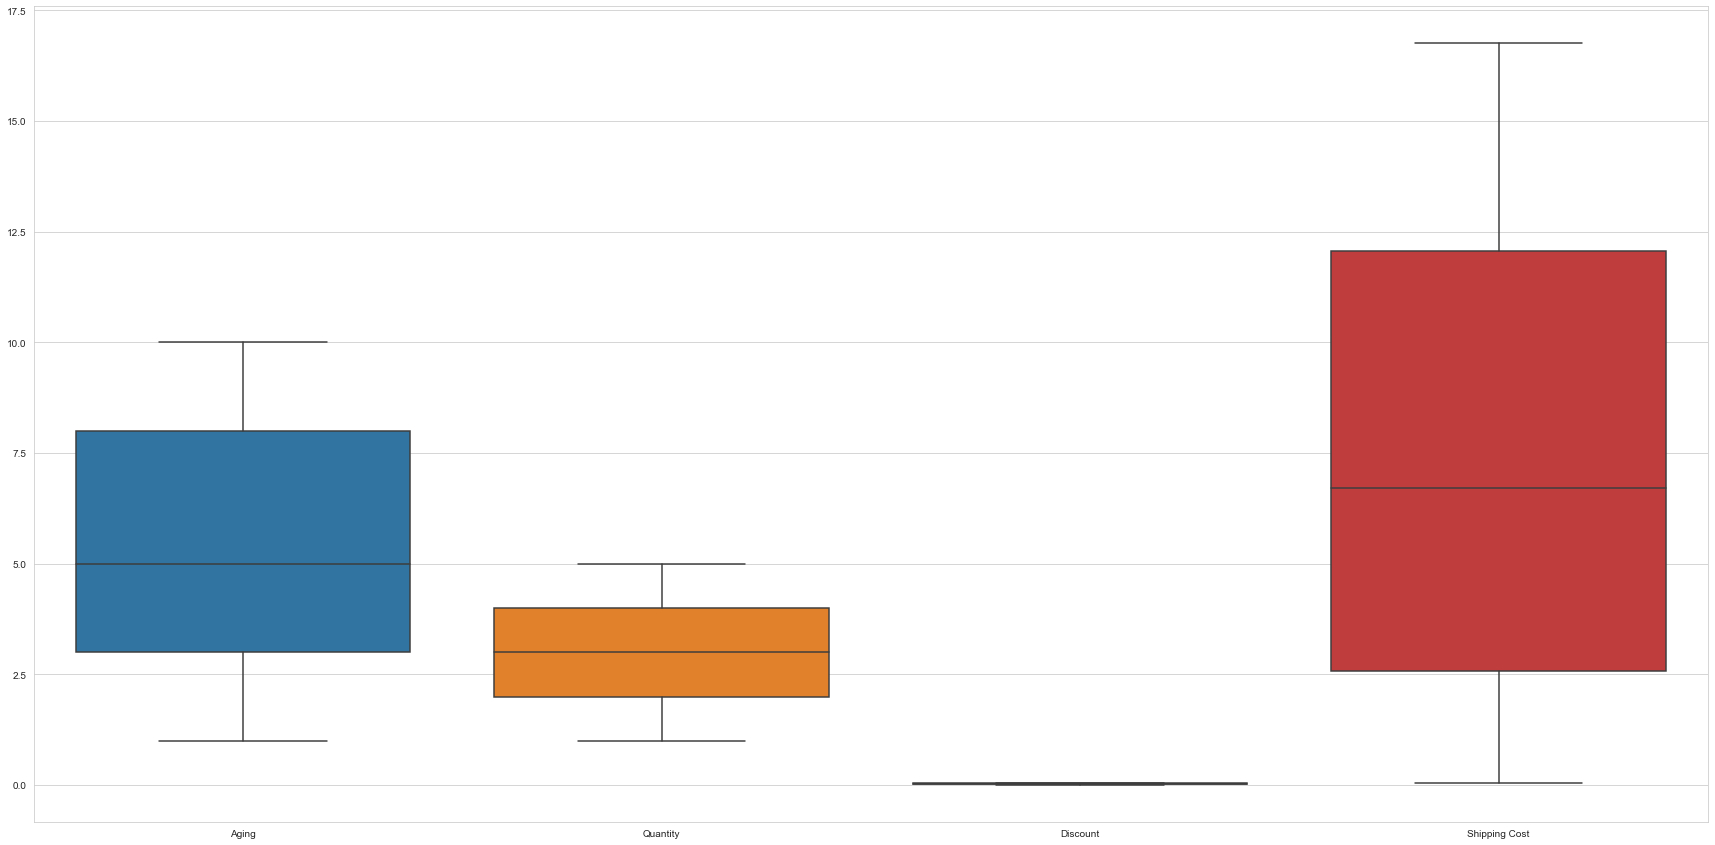

In [13]:
plt.figure(figsize=[30,15])
dff1 = df.drop(['Sales','Profit'],axis=1)
sns.boxplot(data =dff1)
plt.show()

In [14]:
# we do not have outliers in the data

<AxesSubplot:>

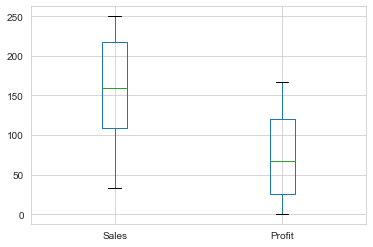

In [15]:
dff2 = df.drop(['Aging','Quantity','Discount','Shipping Cost'],axis=1)
dff2.boxplot()

In [16]:
# we do not have outliers in the data.

# Univariate Analysis

In [17]:
df.Product.value_counts().head()

Sports Wear     2827
Fossil Watch    2796
Titak watch     2795
Sneakers        2795
Formal Shoes    2795
Name: Product, dtype: int64

In [18]:
#product sports wear sold the most in year 2015

In [19]:
df.Product.value_counts().tail(10)

LED               224
LCD               224
Iron              221
Watch             221
Samsung Mobile    221
Tablet            221
Mouse             221
Keyboard          221
Apple Laptop      221
Fans              221
Name: Product, dtype: int64

In [20]:
#least sold products with a count of 221 products for the year

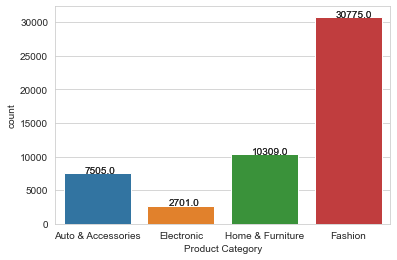

In [21]:
sns.countplot(x = 'Product Category',data = df)
ax = sns.countplot(x='Product Category', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [22]:
#Product category "Fashion" sold the most and least sold is "electronic"

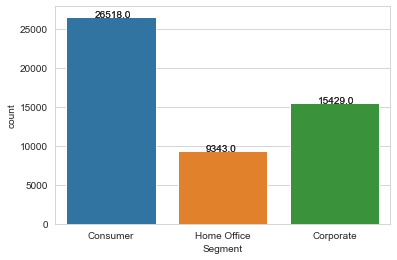

In [23]:
sns.countplot(x = 'Segment',data = df)
ax = sns.countplot(x='Segment', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [24]:
#Segment wise "Consumer" products sold the most and least sold is "Home Office Segment" products

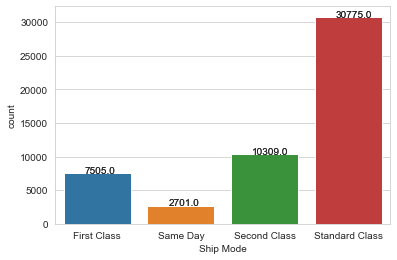

In [25]:
sns.countplot(x = 'Ship Mode',data = df)
ax = sns.countplot(x='Ship Mode', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [26]:
#most products are shipped "standard class" , least products shipped are on "Same day"

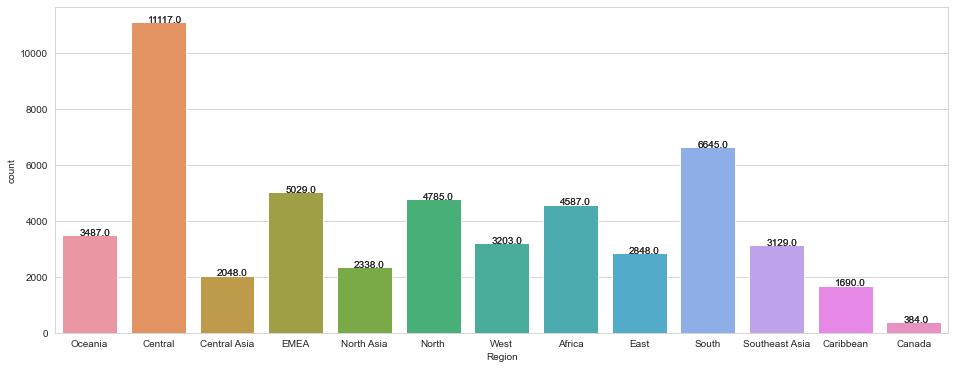

In [27]:
plt.figure(figsize=[16,6])
sns.countplot(x = 'Region',data = df)
ax = sns.countplot(x='Region', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [28]:
#most orders are from "Central" and least orders are from "Canada"
#Note: Sales and quantity wise may vary 

In [29]:
df['Customer Name'].value_counts().head()

Mcclain O'Donnell    108
Spears Thornton      106
Flores Brooks        102
Bates Gockenbach     102
Booth Pistole        102
Name: Customer Name, dtype: int64

In [30]:
#Most order ID created for Mcclain O'Donnell
#Note: Sales and Quantity wise Customer may vary

In [31]:
df['Customer Name'].value_counts().tail()

Fleming Foster        35
Wheeler Donatelli     34
Beasley Pawlan        31
Kelley Devincentis    31
Oconnor Nelson        29
Name: Customer Name, dtype: int64

In [32]:
#Least order ID created for Oconnor Nelson
#Note: Sales and Quantity wise Customer may vary

# Bivariate Analysis

# Quantitative and Quantitative Analysis

In [33]:
data = df
data['month'] = data['Order Date'].dt.month
data.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,month
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,4.600,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,11
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,11.201,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,6
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,3.115,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,12
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,2.620,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,5
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,...,16.000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,7


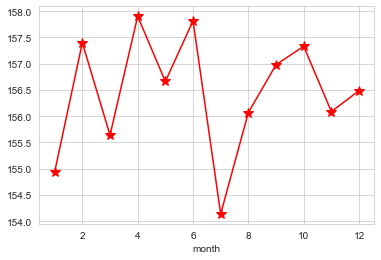

<Figure size 1152x432 with 0 Axes>

In [34]:
data.groupby('month')['Sales'].mean().plot(marker='*',markersize=10,color='red')
plt.figure(figsize=[16,6])
plt.show()

In [35]:
data.groupby(['month'])['Sales'].mean().sort_values(ascending = False)

month
4     157.903257
6     157.815246
2     157.400052
10    157.332420
9     156.979747
5     156.661309
12    156.485211
11    156.088186
8     156.069800
3     155.639393
1     154.939977
7     154.139933
Name: Sales, dtype: float64

In [36]:
#Avg sales are high in April(4) and low in July(7) 

In [37]:
data_1 = data
data_1['day'] = data_1['Order Date'].dt.day
data_1.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,month,day
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,11,9
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,6,30
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,12,5
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,5,9
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,...,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,7,9


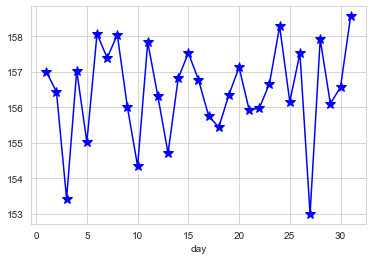

<Figure size 1152x432 with 0 Axes>

In [38]:
data_1.groupby('day')['Sales'].mean().plot(marker='*',markersize=10,color='blue')
plt.figure(figsize=[16,6])
plt.show()

In [39]:
data.groupby('day')['Sales'].mean().sort_values(ascending=False)

day
31    158.563116
24    158.277582
6     158.066467
8     158.043728
28    157.912967
11    157.831967
15    157.529277
26    157.515826
7     157.387962
20    157.124851
4     157.029048
1     156.999402
14    156.811098
16    156.774681
23    156.666054
30    156.568212
2     156.436975
19    156.348949
12    156.304655
25    156.156907
29    156.096690
9     155.992326
22    155.975400
21    155.918919
17    155.757125
18    155.433756
5     155.013906
13    154.708232
10    154.339296
3     153.427490
27    152.993289
Name: Sales, dtype: float64

In [40]:
#Avg sales are high on 31st day and low on 27th day of each month

In [41]:
data = df
data['week'] = data['Order Date'].dt.week
data.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Customer ID,Customer Name,Segment,City,State,Country,Region,month,day,week
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,11,9,46
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,6,30,27
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,12,5,49
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,5,9,19
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,...,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,7,9,28


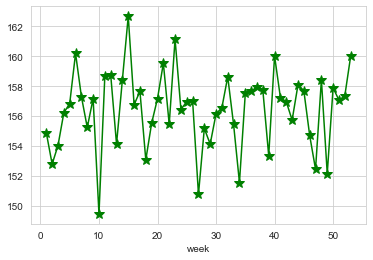

<Figure size 1152x432 with 0 Axes>

In [42]:
data_1.groupby('week')['Sales'].mean().plot(marker='*',markersize=10,color='green')
plt.figure(figsize=[16,6])
plt.show()

In [43]:
data.groupby('week')['Sales'].mean().sort_values(ascending=False)

week
15    162.679793
23    161.144628
6     160.196774
40    160.020488
53    160.003697
21    159.538618
12    158.778926
11    158.672228
32    158.629905
48    158.434146
14    158.431316
44    158.088296
37    157.974657
50    157.889210
38    157.723251
45    157.703940
17    157.655246
36    157.648760
35    157.523139
52    157.355263
7     157.304603
41    157.236155
20    157.170502
9     157.167189
51    157.067882
26    156.997021
25    156.975401
42    156.962319
5     156.842213
16    156.759596
31    156.564484
24    156.438884
4     156.223938
30    156.151663
43    155.732365
19    155.531377
22    155.459488
33    155.438632
8     155.242268
28    155.176412
1     154.892100
46    154.707631
13    154.127615
29    154.124494
3     154.033268
39    153.355711
18    153.073998
2     152.790576
47    152.443288
49    152.153171
34    151.557632
27    150.773305
10    149.457561
Name: Sales, dtype: float64

In [44]:
#Avg sales are high in 15th week of year and low in 10th week of the year

In [45]:
data.groupby('Customer Name')['Sales'].mean().sort_values(ascending=False)

Customer Name
Mcclure Schwarz       184.753247
Patterson Brittain    183.571429
Gilmore Norris        182.352941
Green Baptist         181.795455
Leon Sissman          181.344444
                         ...    
Gregory Gibson        133.568182
Mullins Hansen        130.824561
Rojas Schmidt         130.638298
Marks Schneider       128.055556
Morin Zettner         124.750000
Name: Sales, Length: 795, dtype: float64

In [46]:
#Avg_sales are high for Customer - Mcclure Schwarz for the year
#Avg_sales are low for Customer - Morin Zettner for the year

In [47]:
data.groupby('State')['Sales'].mean().sort_values(ascending=False)

State
Mérida          250.0
Stara Zagora    250.0
Tipaza          236.0
Al Minufiyah    231.0
Galway          231.0
                ...  
Basilicata       54.0
Tanga            54.0
Ibb              54.0
Kabarole         34.0
Gangwon          33.0
Name: Sales, Length: 1094, dtype: float64

In [48]:
#Avg_sales are high for state "Merida & Stara Zagora" for the year
#Avg_sales are low for state "Gangwon" for the year

In [49]:
data.groupby('Country')['Sales'].mean().sort_values(ascending=False)

Country
Eritrea                 219.500000
South Sudan             210.000000
United Arab Emirates    194.214286
Papua New Guinea        178.727273
Sudan                   177.826087
                           ...    
Slovenia                122.000000
Slovakia                121.250000
Swaziland               113.000000
Macedonia               103.500000
Lesotho                  97.000000
Name: Sales, Length: 147, dtype: float64

In [50]:
#Avg_sales are high for country "Eritrea" for the year
#Avg_sales are low for country "Lesotho" for the year

In [51]:
data.groupby('City')['Sales'].mean().sort_values(ascending=False).head(10)

City
Kamina          250.0
Stara Zagora    250.0
Los Patios      250.0
Abilene         250.0
Gandia          250.0
Andria          250.0
Buca            249.0
Stakhanov       248.0
Danbury         248.0
Felahiye        248.0
Name: Sales, dtype: float64

In [52]:
#Avg_sales are low for states with Avg_sales as Rs 33 for the year

In [53]:
data.groupby('Order Priority')['Shipping Cost'].mean().sort_values(ascending=False)

Order Priority
Low         8.081556
Medium      7.517609
High        6.981001
Critical    6.084012
Name: Shipping Cost, dtype: float64

In [54]:
#Avg_shipping_cost is Rs 8.08 for low priority products
#Avg_shipping_cost is Rs 6.08 for critical priority products

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

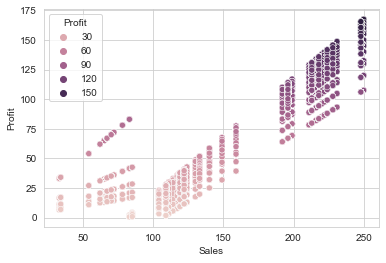

In [55]:
sns.scatterplot(data=df,x='Sales',y=df['Profit'],hue='Profit')

In [56]:
# Profit have grown wrt sales

# Quantitative and Categorical Analysis

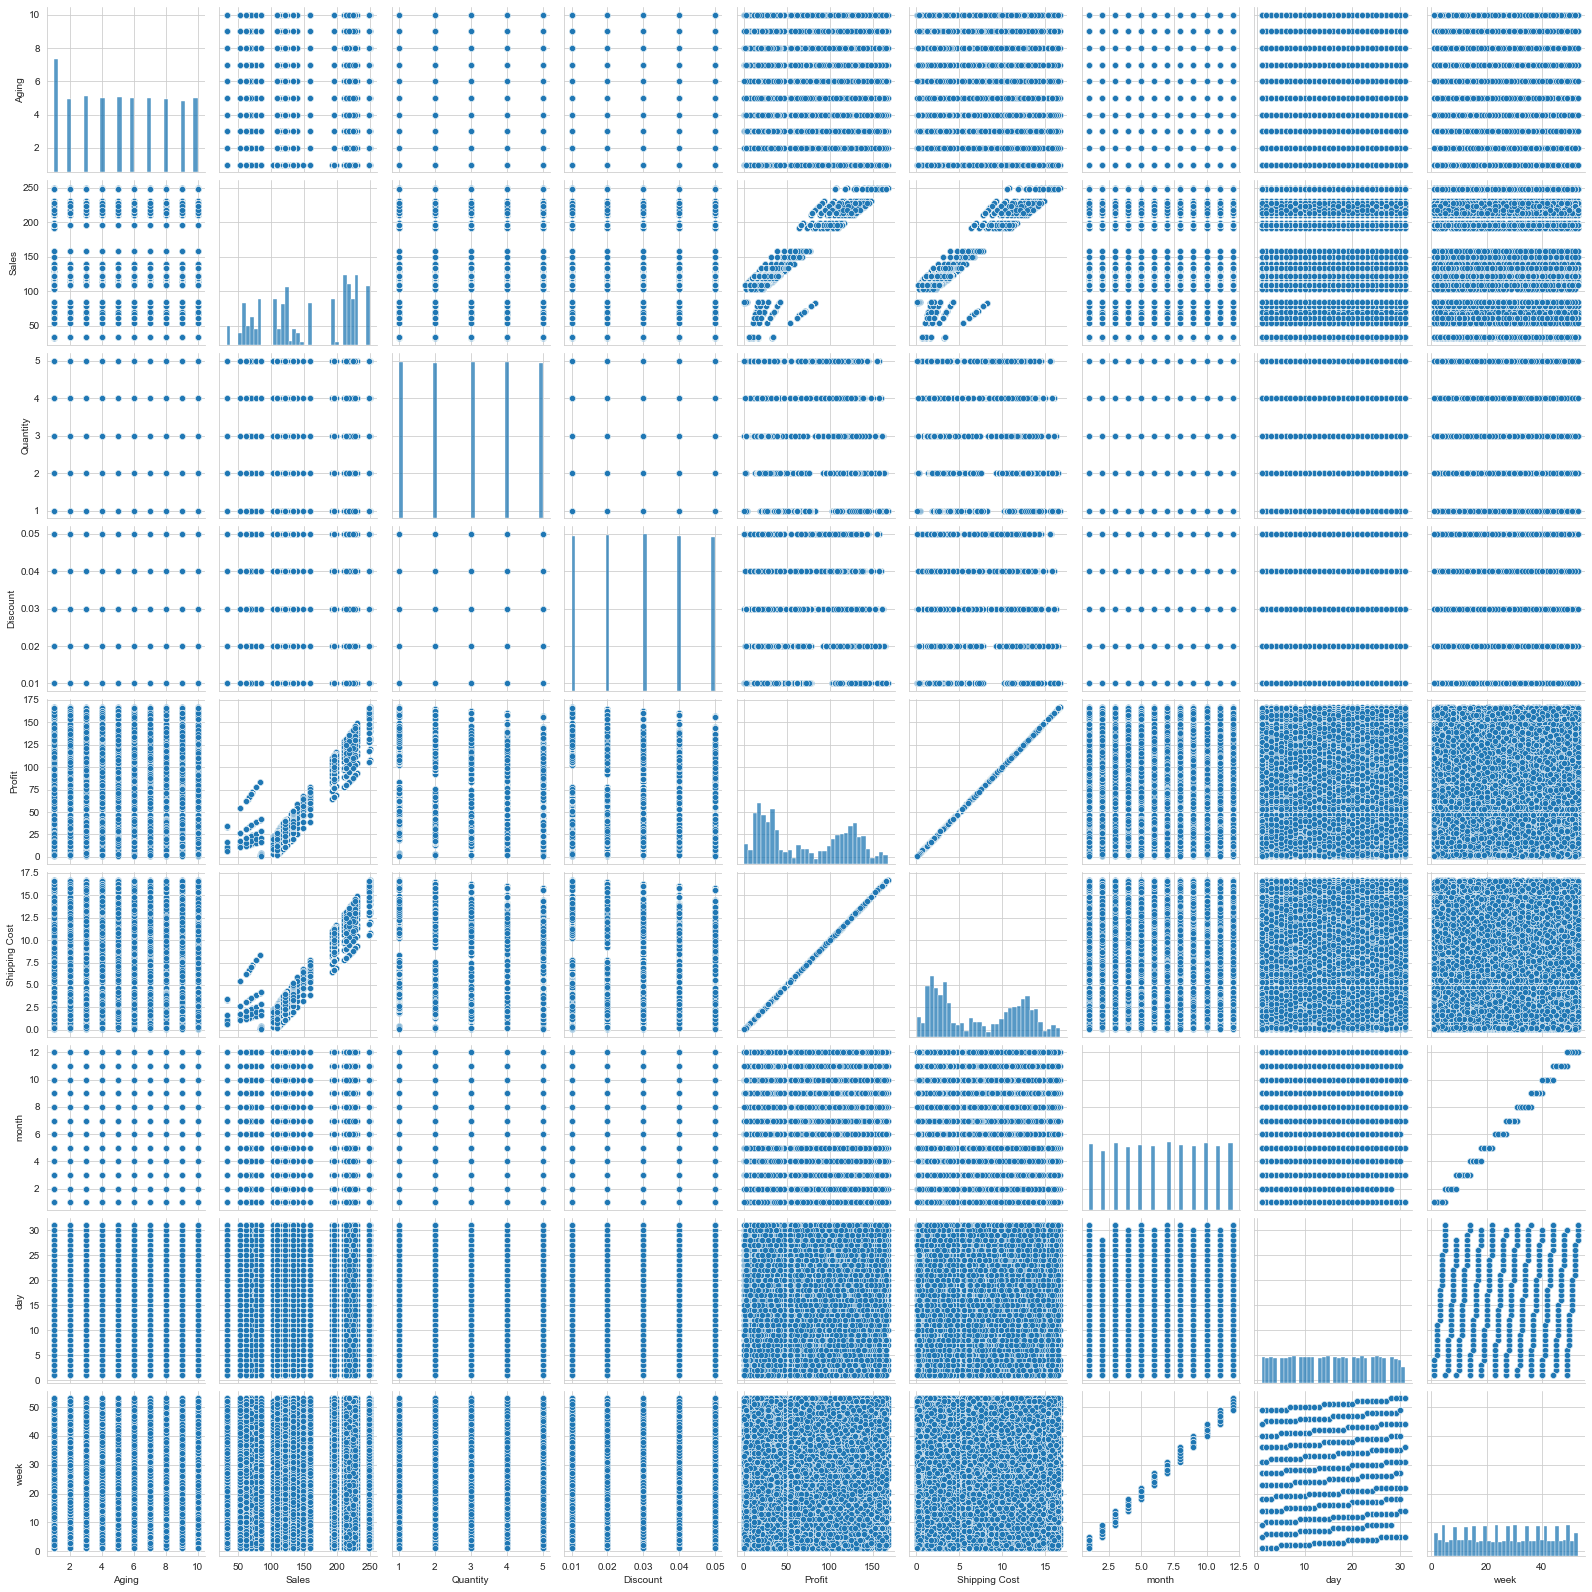

In [57]:
sns.pairplot(df)

In [58]:
# by the pairplot we can get plenty of inferences for example
# Shipping cost is directly proportional or increases wrt Profit, sales

# Categorical and Categorical Analysis

In [59]:
count = pd.crosstab(index = df['Product'],columns=df['Discount'])
count

Discount,0.01,0.02,0.03,0.04,0.05
Product,,,,,
Apple Laptop,42,52,49,42,36
Bed Sheets,193,203,212,203,217
Beds,218,191,209,194,217
Bike Tyres,136,171,184,175,160
Car & Bike Care,154,187,164,178,143
Car Body Covers,153,172,173,178,150
Car Mat,159,144,148,189,186
Car Media Players,191,176,161,155,143
Car Pillow & Neck Rest,150,170,190,167,152


inference for example: Apple Laptop 1% Discount - 42 laptops sold 2% Discount - 52 laptops sold 3% Discount - 49 laptops sold 4% Discount - 42 laptops sold 5% Discount - 36 laptops sold

In [60]:
count1 = pd.crosstab(index = df['Product Category'],columns=df['Order Priority'])
count1

Order Priority,Critical,High,Low,Medium
Product Category,,,,
Auto & Accessories,1734,3413,0,2358
Electronic,742,1269,0,690
Fashion,0,6809,2424,21542
Home & Furniture,1456,4010,0,4843


In [61]:
count2 = pd.crosstab(index = df['Product Category'],columns=df['Product'])
count2

Product,Apple Laptop,Bed Sheets,Beds,Bike Tyres,Car & Bike Care,Car Body Covers,Car Mat,Car Media Players,Car Pillow & Neck Rest,Car Seat Covers,...,Speakers,Sports Wear,Suits,T - Shirts,Tablet,Titak watch,Towels,Tyre,Umbrellas,Watch
Product Category,,,,,,,,,,,,,,,,,,,,,
Auto & Accessories,0,0,0,826,826,826,826,826,829,827,...,0,0,0,0,0,0,0,893,0,0
Electronic,221,0,0,0,0,0,0,0,0,0,...,261,0,0,0,221,0,0,0,0,221
Fashion,0,0,0,0,0,0,0,0,0,0,...,0,2827,2795,2794,0,2795,0,0,0,0
Home & Furniture,0,1028,1029,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1028,0,1029,0


In [62]:
# Auto & Accessories - Tyre 833 - max sold
# Electronics - Speakers 261 - max sold
# Fashion - sports wear - 2827 max sold
# Home and furniture - Dinner Crockery 1053 - max sold 

In [63]:
count3 = pd.crosstab(index = df['Region'],columns=df['Segment'])
count3

Segment,Consumer,Corporate,Home Office
Region,,,
Africa,2381,1312,894
Canada,202,110,72
Caribbean,828,507,355
Central,5782,3321,2014
Central Asia,1042,613,393
EMEA,2538,1574,917
East,1469,877,502
North,2468,1487,830
North Asia,1170,708,460


In [64]:
#Central has most segment wise products sold
#Canada has least segment wise products sold

# Outlier treatment

In [65]:
df.Sales.shape

(51290,)

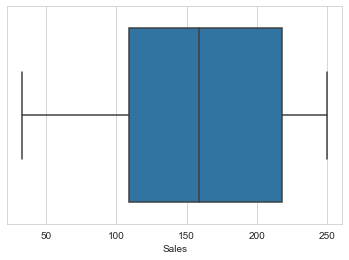

In [66]:
sns.boxplot(x = df['Sales'])
plt.show()

In [67]:
Q1 = df.Sales.quantile(0.25)
Q3 = df.Sales.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

109.0


In [68]:
df = df[~((df.Sales < (Q1 - 1.5 * IQR)) |(df.Sales > (Q3 + 1.5 * IQR)))]
df.Sales.shape

(51290,)

# Feature Engineering

In [69]:
# Encoding the Categorical Variables for further analysis

In [70]:
df_cat2 = df_cat.drop(['Order ID','Customer ID','Customer Name','City'],axis=1)


In [71]:
df_cat3 = pd.get_dummies(df_cat2, columns = ['Product','Product Category','Order Priority','Segment','Ship Mode','State','Country','Region'])


In [72]:
df_cat3

,Product_Apple Laptop,Product_Bed Sheets,Product_Beds,Product_Bike Tyres,Product_Car & Bike Care,Product_Car Body Covers,Product_Car Mat,Product_Car Media Players,Product_Car Pillow & Neck Rest,Product_Car Seat Covers,...,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
51288,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [73]:
df_encoded_final = pd.concat([df_num,df_cat3],axis=1)
dff2.head()


,Order ID,Order Date,Shipping Date,Ship Mode,Product Category,Product,Sales,Profit,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region
0,AU-2015-1,2015-11-09,2015-11-17,First Class,Auto & Accessories,Car Media Players,140,46.00,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania
1,AU-2015-2,2015-06-30,2015-07-02,First Class,Auto & Accessories,Car Speakers,211,112.01,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central
2,AU-2015-3,2015-12-05,2015-12-13,First Class,Auto & Accessories,Car Body Covers,117,31.15,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania
3,AU-2015-4,2015-05-09,2015-05-16,First Class,Auto & Accessories,Car & Bike Care,118,26.20,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia
4,AU-2015-5,2015-07-09,2015-07-18,First Class,Auto & Accessories,Tyre,250,160.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania


In [74]:
df_correlation=df_encoded_final.corr()
df_correlation

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost,Product_Apple Laptop,Product_Bed Sheets,Product_Beds,Product_Bike Tyres,...,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West
Aging,1.000000,0.014840,-0.002432,0.000129,0.015236,0.015236,-0.094569,0.009909,0.009892,0.009018,...,-0.002722,0.010318,0.000098,0.006864,-0.005602,-0.001777,-0.001736,0.001574,0.001100,-0.000324
Sales,0.014840,1.000000,-0.000512,-0.007250,0.921502,0.921502,0.093572,0.118637,-0.170602,-0.164212,...,-0.002267,0.000958,0.001372,0.001230,0.001994,0.005796,-0.000766,-0.004064,0.014177,-0.004433
Quantity,-0.002432,-0.000512,1.000000,0.007170,-0.176294,-0.176294,-0.006403,-0.001303,0.005683,0.001230,...,-0.001945,0.001445,-0.003964,-0.000020,0.001417,0.006434,-0.000472,0.000406,0.005096,0.005793
Discount,0.000129,-0.007250,0.007170,1.000000,-0.119111,-0.119111,-0.004505,0.005024,0.000391,0.005968,...,-0.004255,0.002816,-0.001741,0.004537,-0.003951,-0.001805,0.001924,0.002352,0.006004,-0.006609
Profit,0.015236,0.921502,-0.176294,-0.119111,1.000000,1.000000,0.102781,0.113905,-0.110672,-0.104939,...,-0.004121,0.001200,0.003786,-0.000743,0.001790,0.001690,0.000157,-0.004836,0.013341,-0.001911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Region_North Asia,-0.001777,0.005796,0.006434,-0.001805,0.001690,0.001690,0.004176,0.002761,-0.002604,0.002486,...,-0.114964,-0.044569,-0.072056,-0.052990,-0.070102,1.000000,-0.059025,-0.084314,-0.055705,-0.056403
Region_Oceania,-0.001736,-0.000766,-0.000472,0.001924,0.000157,0.000157,0.008248,0.001719,0.000576,-0.006249,...,-0.142077,-0.055080,-0.089050,-0.065487,-0.086634,-0.059025,1.000000,-0.104198,-0.068842,-0.069705
Region_South,0.001574,-0.004064,0.000406,0.002352,-0.004836,-0.004836,-0.002333,0.007794,-0.003443,0.003683,...,-0.202949,-0.078679,-0.127202,-0.093545,-0.123752,-0.084314,-0.104198,1.000000,-0.098337,-0.099569
Region_Southeast Asia,0.001100,0.014177,0.005096,0.006004,0.013341,0.013341,-0.000600,-0.007390,-0.012070,0.000394,...,-0.134085,-0.051982,-0.084040,-0.061804,-0.081761,-0.055705,-0.068842,-0.098337,1.000000,-0.065784


In [75]:
mean = np.mean(df)
std = np.std(df)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is Aging              5.255040
Sales            156.431683
Quantity           2.997309
Discount           0.029971
Profit            72.721836
Shipping Cost      7.272184
month              6.537083
day               15.745564
week              27.051453
dtype: float64
std. deviation is Order Date       105 days 12:14:24.157900168
Shipping Date    105 days 13:07:18.738756190
Aging                               2.959876
Sales                              65.780732
Quantity                            1.413439
Discount                            0.014114
Profit                             49.098849
Shipping Cost                       4.909885
month                               3.451968
day                                 8.786009
week                               15.078793
dtype: object


In [76]:
print("Mean value of Sales",df.Sales.mean())
print("Standard deviation of Sales",df.Sales.std())
print("Minimum value of Sales",df.Sales.min())
print("Maximum value of Sales",df.Sales.max())

Mean value of Sales 156.4316825891987
Standard deviation of Sales 65.78137370587001
Minimum value of Sales 33
Maximum value of Sales 250


In [77]:
mean_Sales=np.mean(df["Sales"])
std_price=np.std(df["Sales"])
print("Mean Sales: ",mean_Sales, '\t','\t', 'Standard Deviation: ', std_price)

Mean Sales:  156.4316825891987 	 	 Standard Deviation:  65.78073243374733


# QQ Plot

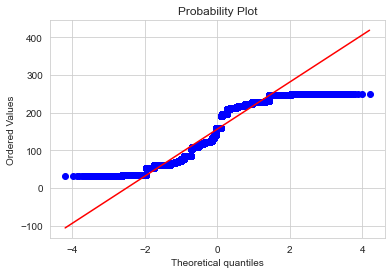

In [78]:
import pylab

import scipy.stats as stats

measurements = df['Sales']

stats.probplot(measurements, dist="norm", plot=pylab);

We can say that our Sales column is not Normally distributed

In [79]:
df_num.head()

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
0,8,140,2,0.05,46.00,4.600
1,2,211,3,0.03,112.01,11.201
2,8,117,5,0.01,31.15,3.115
3,7,118,2,0.05,26.20,2.620
4,9,250,1,0.04,160.00,16.000


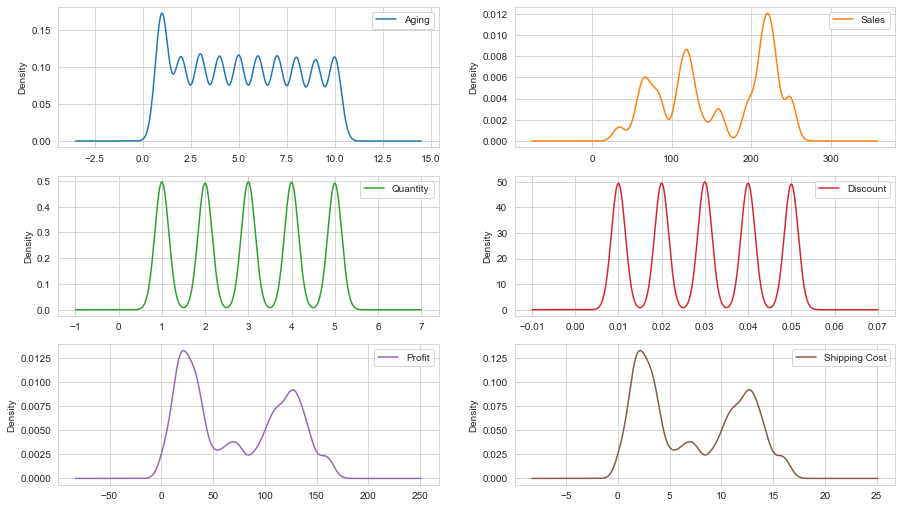

In [80]:
plt.rcParams["figure.figsize"] = [15,15]


df_num.plot(kind = 'density', subplots = True, layout = (5,2), sharex = False)

# show plot

plt.show()

In [81]:
# plot density plot using plot()

# kind: set the type of plot

# subplots: indicates whether to plot subplot for each variable or a single line plot

# layout: specify the arrangement of the subplots

# sharex: indicates whether to have the same scale on x-axis of all subplots

# Feature Selection

In [82]:
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [83]:
X = df_encoded_final.drop(columns='Sales',axis=1)
y = df_encoded_final['Sales']

In [84]:
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

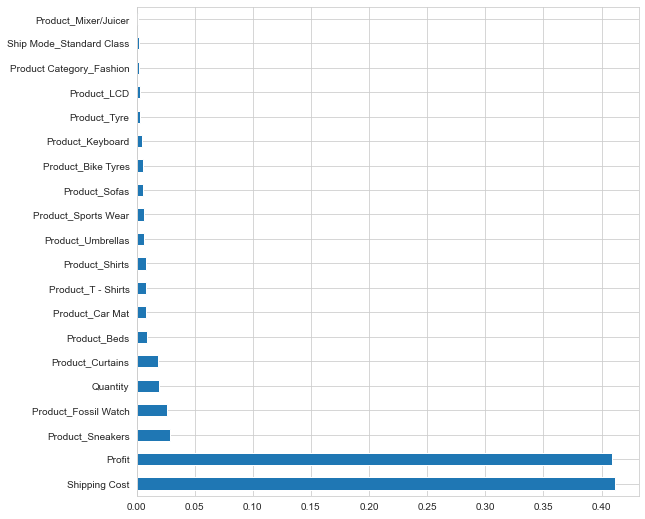

In [85]:
plt.figure(figsize=(9,9))

feat = pd.Series(etr.feature_importances_ , index=X.columns)
feat.nlargest(20).plot(kind='barh')

plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=49)

In [87]:
import scipy.stats as stats

Statistical test to prove the data is split into 70:30

H0: Mean for X = mean for X_train
H1: Mean for X != mean for X_train
if pvalue<0.05 we will reject H0

In [88]:
stats.ttest_ind(X,X_train)

Ttest_indResult(statistic=array([ 0.19493409,  0.13436954,  0.36660266, ...,  0.48287101,
        0.23397655, -0.3278946 ]), pvalue=array([0.84544497, 0.89311066, 0.71391626, ..., 0.62918847, 0.8150037 ,
       0.7429921 ]))

In [89]:
stats.ttest_ind(X,X_test)

Ttest_indResult(statistic=array([-0.47743953, -0.32888856, -0.89767676, ..., -1.17817783,
       -0.57131777,  0.80669598]), pvalue=array([0.63305087, 0.74224104, 0.36936142, ..., 0.23873028, 0.56778635,
       0.41984478]))

In [90]:
df_encoded_final.head()

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost,Product_Apple Laptop,Product_Bed Sheets,Product_Beds,Product_Bike Tyres,...,Region_Central,Region_Central Asia,Region_EMEA,Region_East,Region_North,Region_North Asia,Region_Oceania,Region_South,Region_Southeast Asia,Region_West
0,8,140,2,0.05,46.00,4.600,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,211,3,0.03,112.01,11.201,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,8,117,5,0.01,31.15,3.115,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7,118,2,0.05,26.20,2.620,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,9,250,1,0.04,160.00,16.000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# MLR Full Model

In [91]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [92]:
# print the shape of train and test sets
print("X_train",X_train.shape)
print("y_test",y_test.shape)

X_train (35903, 1316)
y_test (15387,)


# Train the model on the training set

In [93]:
X_constant= sm.add_constant(X_train)
lin_reg= sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.009e+27
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:45:20   Log-Likelihood:             8.8234e+05
No. Observations:               35903   AIC:                        -1.762e+06
Df Residuals:                   34765   BIC:                        -1.753e+06
Df Model:                        1137                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         66.9402   2.13e-13   3.14e+14      0.000      66.940      66.940
Aging                                      -7.466e-15      1e-14     -0.743      0.457   -2.72e-14    1.22e-14
Quantity                                   -1.038e-13   2.81e-14     -3.696      0.000   -1.59e-13   -4.88e-14
Discount                                    -2.11e-11   2.35e-12     -8.987      0.000   -2.57e-11   -1.65e-11
Profit                                     -8.478e-13   3.22e-15   -262.925      0.000   -8.54e-13   -8.42e-13
Shipping Cost                               8.174e-12   3.22e-16   2.53e+04      0.000    8.17e-12    8.17e-12
Product_Apple Laptop                         104.8705    4.9e-13   2.14e+14      0.000     104.870     104.870
Product_Bed Sheets                            83.7506    2.6e-13   3.22e+14      0.000      83.751      83.751
Product_Beds                                 -49.2494   1.99e-13  -2.48e+14      0.000     -49.249     -49.249
Product_Bike Tyres                           -71.4862   2.34e-13  -3.05e+14      0.000     -71.486     -71.486
Product_Car & Bike Care                      -25.4862   2.38e-13  -1.07e+14      0.000     -25.486     -25.486
Product_Car Body Covers                      -26.4862   2.37e-13  -1.12e+14      0.000     -26.486     -26.486
Product_Car Mat                              -89.4862   2.38e-13  -3.76e+14      0.000     -89.486     -89.486
Product_Car Media Players                     -3.4862   2.12e-13  -1.64e+13      0.000      -3.486      -3.486
Product_Car Pillow & Neck Rest                87.5138   3.02e-13    2.9e+14      0.000      87.514      87.514
Product_Car Seat Covers                      -29.4862   2.46e-13   -1.2e+14      0.000     -29.486     -29.486
Product_Car Speakers                          67.5138   2.63e-13   2.57e+14      0.000      67.514      67.514
Product_Casula Shoes                         -44.9669   1.94e-13  -2.32e+14      0.000     -44.967     -44.967
Product_Curtains                             -93.2494    2.3e-13  -4.05e+14      0.000     -93.249     -93.249
Product_Dinner Crockery                        5.7506   1.91e-13      3e+13      0.000       5.751       5.751
Product_Dinning Tables                        -8.2494   2.09e-13  -3.95e+13      0.000      -8.249      -8.249
Product_Fans                                   3.8705   3.99e-13   9.69e+12      0.000       3.870       3.870
Product_Formal Shoes                          46.0331   1.61e-13   2.86e+14      0.000      46.033      46.033
Product_Fossil Watch                          -7.9669   1.24e-13  -6.44e+13      0.000      -7.967      -7.967
Product_Iron                                  76.8705   4.75e-13   1.62e+14      0.000

In [94]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

# Predict the test set results

In [95]:
y_pred=ml.predict(X_test)
print(y_pred)

[224.  67. 231. ... 218. 248. 218.]


# Evaluate the model

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

Text(0.5, 1.0, 'Actual vs. Predicted')

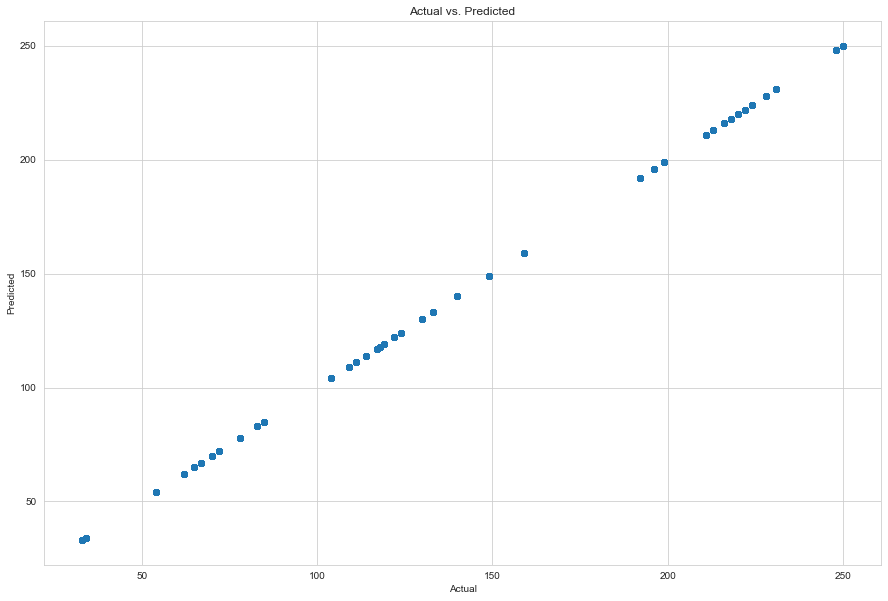

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [98]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
25834,224,224.000000,0.000000
13550,67,67.000000,0.000000
3608,231,231.000000,-0.000000
2713,250,250.000000,-0.000000
41848,85,85.000000,0.000000
33988,228,228.000000,0.000000
11388,34,34.000000,0.000000
43773,109,109.000000,0.000000
11473,124,124.000000,0.000000
34400,109,109.000000,-0.000000


# Random Forest Model

In [99]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=49)

In [100]:
print(X_train.shape[0]/len(df)*100)
print(X_test.shape[0]/len(df)*100)
print(y_train.shape[0]/len(df)*100)
print(y_test.shape[0]/len(df)*100)

80.0
20.0
80.0
20.0


Hence Statistically proved that data is splitted into 80:20

In [101]:
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [102]:
pred = rfr.predict(X_test)

In [103]:
rfr.score(X_train , y_train)

0.9999999909901235

In [104]:
rfr.score(X_test , y_test)

0.9999999953275731

<AxesSubplot:xlabel='Sales', ylabel='Density'>

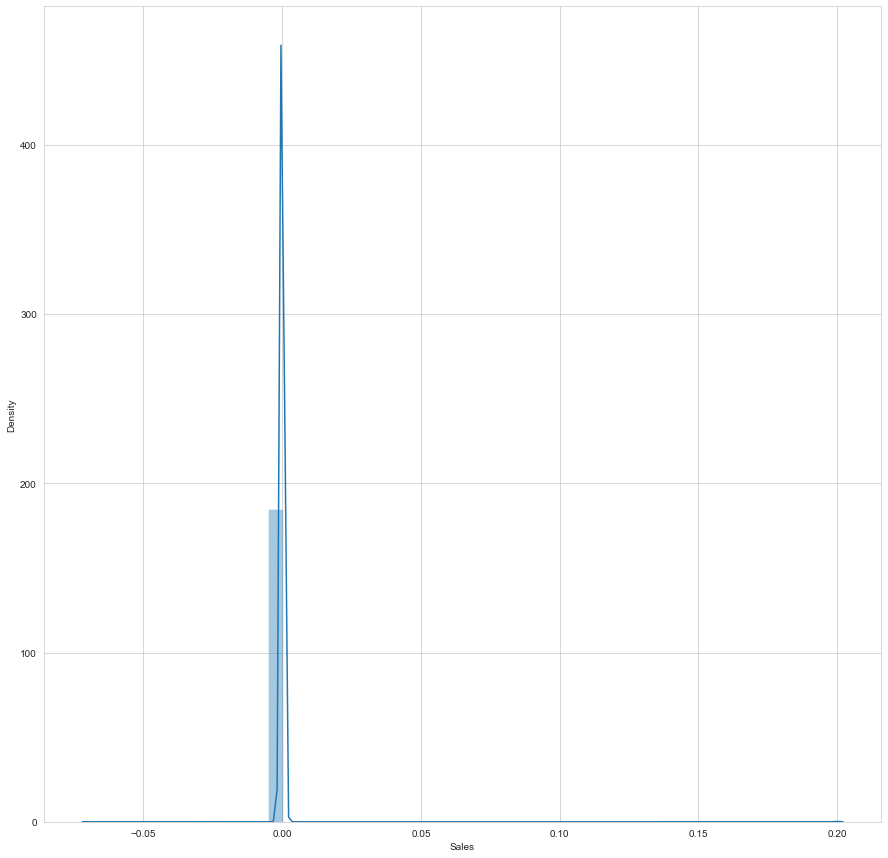

In [105]:
sns.distplot(y_test - pred)

Text(0, 0.5, 'pred')

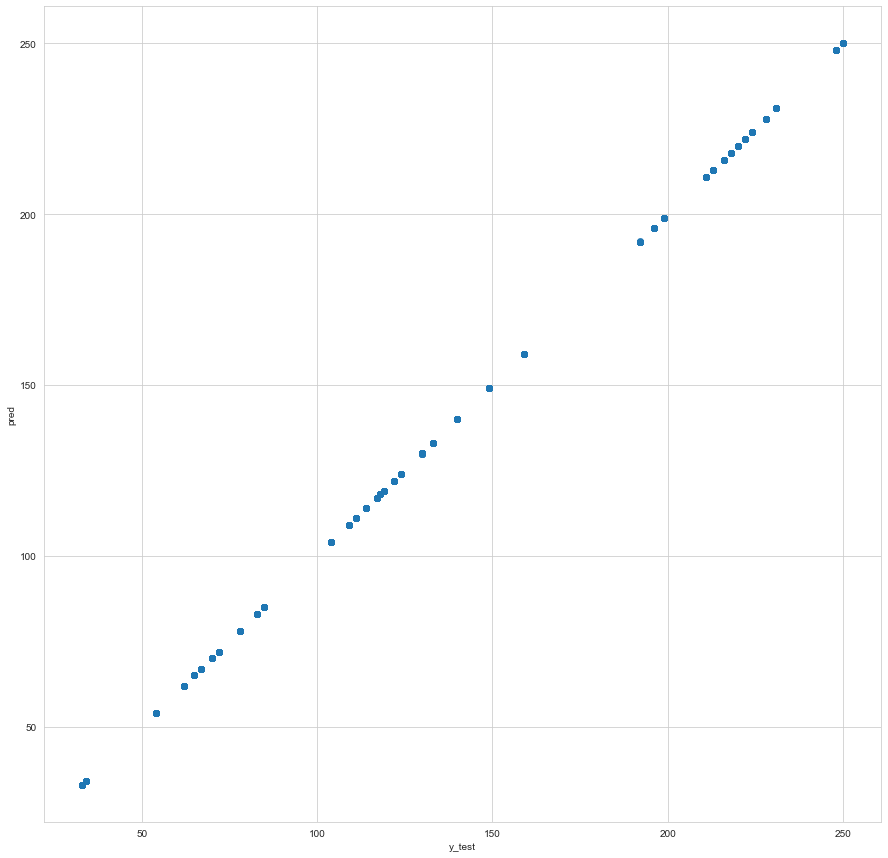

In [106]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.00010430883213101349
MSE: 1.9974653928638753e-05
RMSE: 0.004469301279690009


In [108]:
metrics.r2_score(y_test,pred)

0.9999999953275731

# Hyperparameter tuning

In [109]:
n_estimators = [int(x) for x in np.linspace(100,2000,10)]
max_depth = [int(x) for x in np.linspace(100,2000,10)]
min_samples_split=[2,4,6,8,10,12,14]
min_samples_leaf=[1,3,5,7,8,10]
max_features=['sqrt','log2','auto',None]

random_search = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
    
}

random_search

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', None]}

In [110]:
rfr_random = RandomizedSearchCV(estimator=rfr , param_distributions=random_search , n_iter=10 , cv=5 , verbose=2 , random_state=51 , n_jobs=1)

In [ ]:
rfr_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 3.3min
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 3.2min
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 3.2min
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 3.3min
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time= 3.5min
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time= 4.1min
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time= 4.2min
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split

In [ ]:
rfr_random.best_params_

In [ ]:
prediction = rfr_random.predict(X_test)

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
metrics.r2_score(y_test,prediction)